# Titanic project

Check out the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

Note: You'll need to make an account to access the data.

Download the train.csv file and save it to the same location as your iPython Notebooks.

In [28]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('C:\\Users\\Saiful_desv\Desktop\\Training\\Python Learning\\Taitanic Project\\train.csv')

# Let's see a preview of the data
titanic_df.head()

# We could also get overall info for the dataset
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Research Objectives:

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5. What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?

In [7]:
# Summary of all variables
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smith, Mr. Richard William",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Survival by Gender
pd.crosstab(titanic_df.Survived,titanic_df.Sex,margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [25]:
# Survival by average age by gender == Male

titanic_df[titanic_df.Sex=="male"].groupby('Survived')['Age'].mean()


Survived
0    31.618056
1    27.276022
Name: Age, dtype: float64

In [27]:
# Survival by average age by gender == Female
titanic_df[titanic_df.Sex=="female"].groupby('Survived')['Age'].mean()

Survived
0    25.046875
1    28.847716
Name: Age, dtype: float64

In [30]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

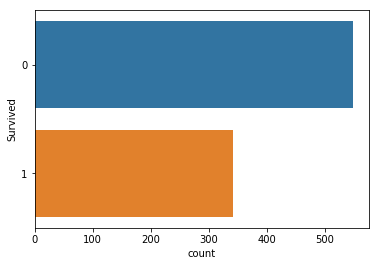

In [52]:
# Sex


# Let's first check gender
sns.countplot(y='Survived',data=titanic_df)


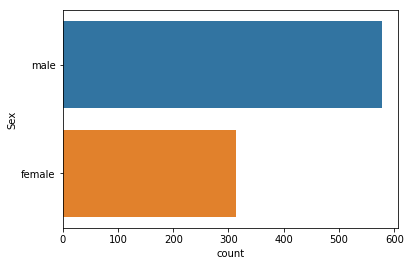

In [56]:
sns.countplot(y="Sex",data=titanic_df)

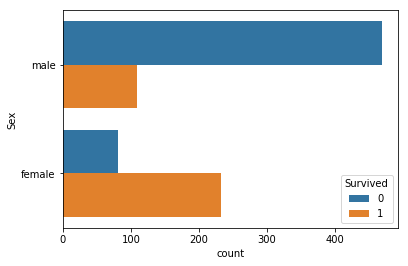

In [57]:
sns.countplot(y="Sex",hue="Survived",data=titanic_df)

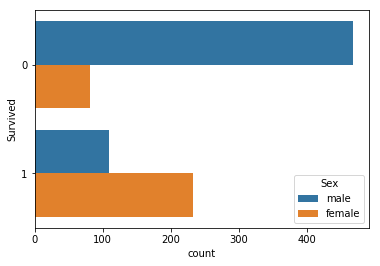

In [58]:
sns.countplot(hue="Sex",y="Survived",data=titanic_df)

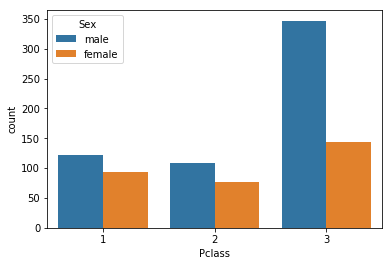

In [61]:
sns.countplot(x="Pclass",hue="Sex",data=titanic_df)

In [62]:
def male_female_child(passanger):
    age,sex=passanger
    if age<16:
        return "Child"
    else:
        return sex

    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

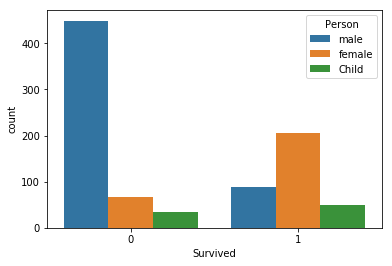

In [63]:
sns.countplot(hue="Person",x="Survived",data=titanic_df)

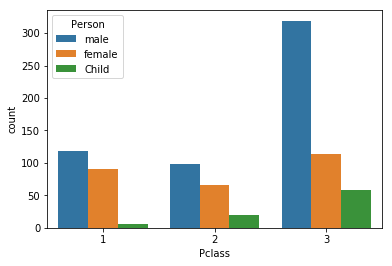

In [64]:
sns.countplot(x="Pclass",hue="Person",data=titanic_df)

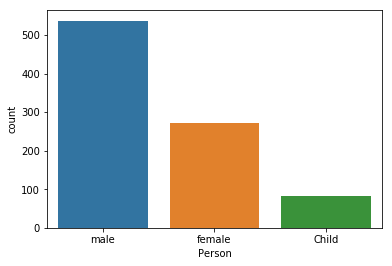

In [65]:
sns.countplot(x="Person",data=titanic_df)

In [66]:
pd.crosstab(titanic_df.Survived,titanic_df.Person,margins=True)

Person,Child,female,male,All
Survived,,,,
0,34,66,449,549
1,49,205,88,342
All,83,271,537,891


In [71]:
(49/83)*100

59.036144578313255

In [72]:
(205/271)*100

75.64575645756457

In [73]:
(88/537)*100

16.387337057728118

In [75]:
sns.countplot(y="Survived",x="Pclass",hue="Person",data=titanic_df)

TypeError: Cannot pass values for both `x` and `y`

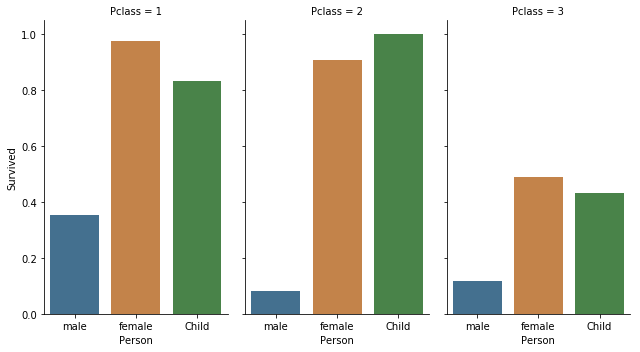

In [76]:
sns.catplot(x="Person", y="Survived", col="Pclass",
                 data=titanic_df, saturation=.5,
                 kind="bar", ci=None, aspect=.6)

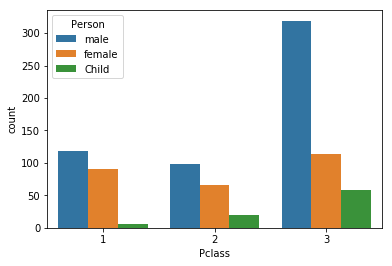

In [77]:
sns.countplot(x="Pclass",hue="Person",data=titanic_df)

In [78]:
pd.crosstab(titanic_df.Pclass,titanic_df.Person,margins=True)

Person,Child,female,male,All
Pclass,,,,
1,6,91,119,216
2,19,66,99,184
3,58,114,319,491
All,83,271,537,891


In [79]:
pd.crosstab(titanic_df.Survived,titanic_df.Pclass,margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


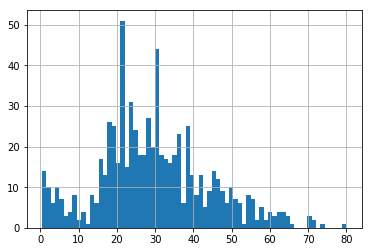

In [80]:
# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [82]:
# We could also get a quick overall comparison of male,female,child
titanic_df['Person'].value_counts()

male      537
female    271
Child      83
Name: Person, dtype: int64

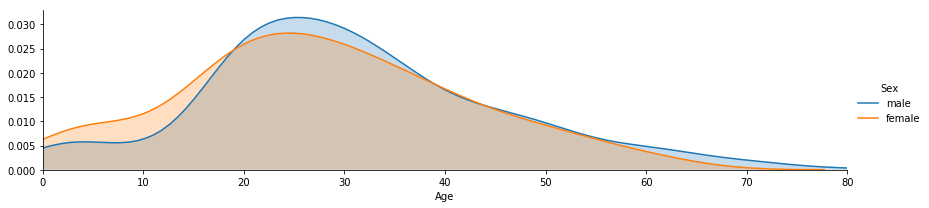

In [85]:
import warnings
warnings.filterwarnings('ignore')

# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

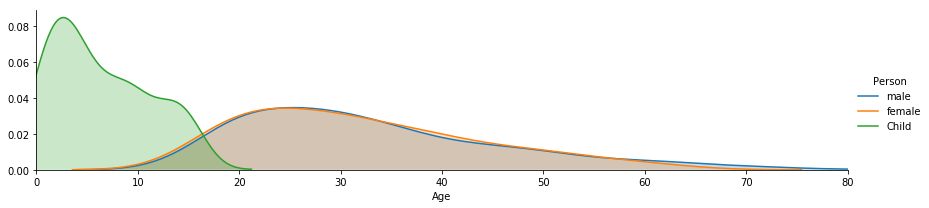

In [87]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

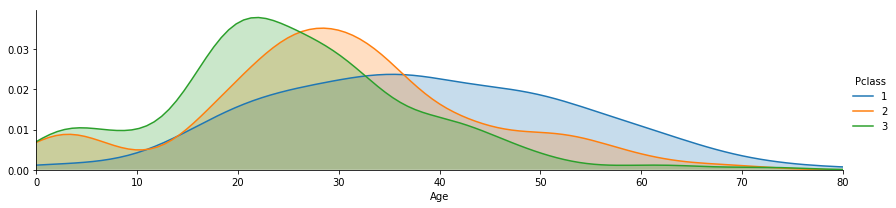

In [88]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [90]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [91]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

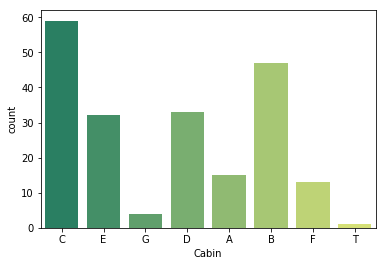

In [99]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    
# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='summer')


In [97]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [98]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


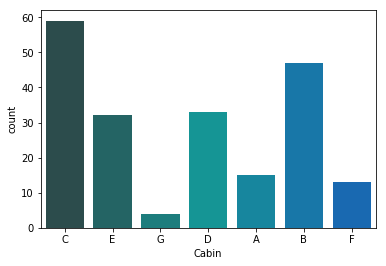

In [102]:

# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

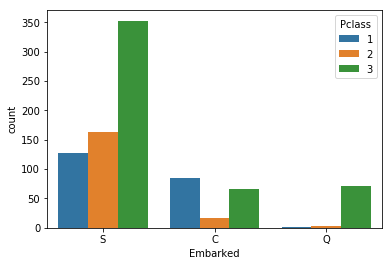

In [104]:
# Now we can make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

In [105]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [108]:

# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [110]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


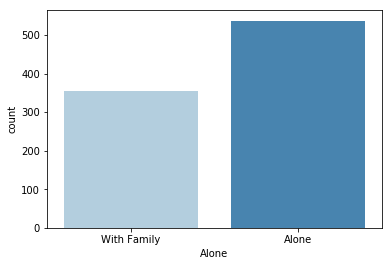

In [111]:
# Now let's get a simple visualization!
sns.countplot('Alone',data=titanic_df,palette='Blues')

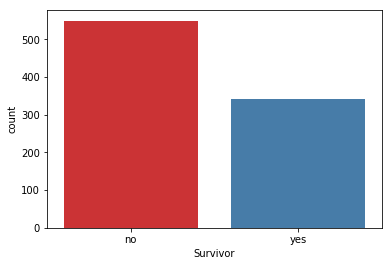

In [112]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.countplot('Survivor',data=titanic_df,palette='Set1')

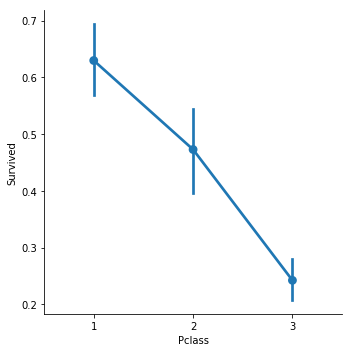

In [113]:
# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=titanic_df)

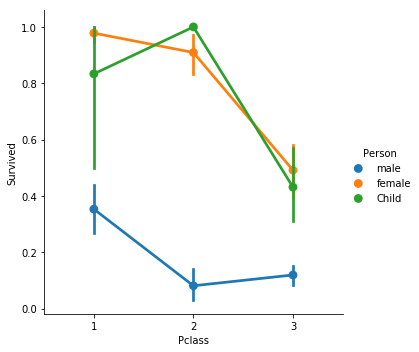

In [115]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)

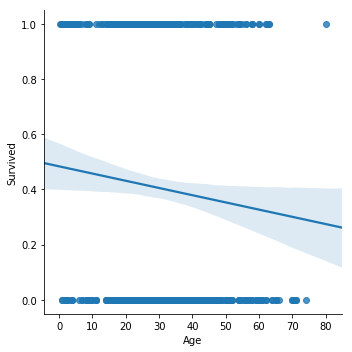

In [116]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

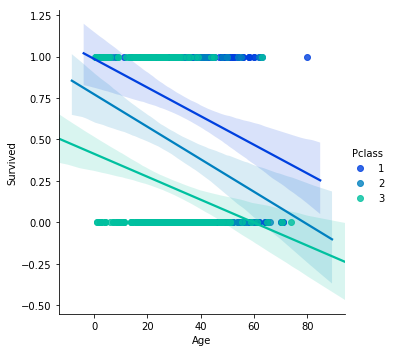

In [117]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

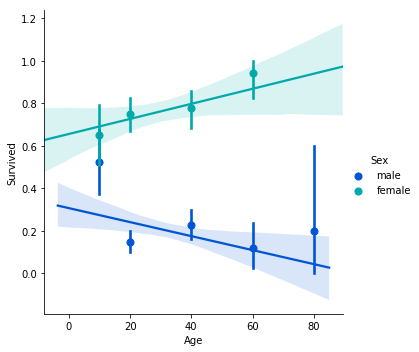

In [119]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [120]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')